In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm

The purpose of this module is to explore performance measures of Hedge Fund data and interpret the results. 

In [9]:
HF_data = pd.read_excel('HF_data.xlsx', sheet_name="Data")
HF_data.dropna(axis=1,inplace = True)
HF_data['Date'] = pd.to_datetime(HF_data.Date)
HF_data.head()

,Date,RF,Mkt-RF,SMB,HML,UMD,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
0,1994-01-31,0.0025,0.0290,0.0011,0.0215,0.0009,0.0117,-0.0055,-0.0163,0.0014,0.0019,0.1051,0.0365,0.0033,0.0127,0.0111
1,1994-02-28,0.0021,-0.0263,0.0272,-0.0137,-0.0027,-0.0250,0.0021,0.0197,-0.0568,0.0117,-0.0117,-0.0018,0.0012,-0.0203,-0.0412
2,1994-03-31,0.0027,-0.0485,-0.0090,0.0129,-0.0131,-0.0391,-0.0025,0.0718,-0.0429,0.0259,-0.0462,-0.0131,-0.0098,-0.0169,-0.0358
3,1994-04-29,0.0027,0.0068,-0.0088,0.0166,0.0039,-0.0157,0.0024,0.0127,-0.0160,0.0084,-0.0837,-0.0067,-0.0253,-0.0022,-0.0175
4,1994-05-31,0.0032,0.0062,-0.0205,0.0012,-0.0222,0.0056,-0.0012,0.0224,0.0378,0.0075,-0.0075,-0.0016,-0.0103,0.0078,0.0222


In [10]:
Funds_list = list(HF_data.columns[6:])
HF_data[HF_data.columns[6:]].mean()

Ln/Sh Eq Hedge Fund USD      0.007535
Eq Mkt Ntr Hedge Fund USD    0.004408
Ded Sh Bs Hedge Fund USD    -0.002216
Global Mac Hedge Fund USD    0.009591
Mngd Fut Hedge Fund USD      0.005103
Emg Mkts Hedge Fund USD      0.006658
Evnt Drvn Hedge Fund USD     0.007359
 Cnvrt Arb Hedge Fund USD    0.006128
Fx Inc Arb Hedge Fund USD    0.004367
DJCS Hedge Fund USD          0.007010
dtype: float64

## Part 1: Calculating Performance Measures
In this part we are calculating the following performance measures for each of the hedge fund index data provided:
• Annualized arithmetic average return 
• Annualized geometric average return 
• Annualized volatility of excess returns 
• Annualized Sharpe ratio
• Market beta
• Annualized alpha (using the market factor) 
• Annualized Information ratio
• Maximum drawdown
• Skewness of monthly excess returns

In [11]:
ans_part_one_df = pd.DataFrame()
new_index = ['Annual Areturn', 'Annual Greturn','Annualized Volatility Excess Return','Annual SR','Market Beta','Annualized Alpha','Annualized Information Ratio','MDD','Skewness']
ans_part_one_df['Performance_measure'] = new_index
ans_part_one_df.set_index(ans_part_one_df['Performance_measure'])
# list_ans_part_one = []
risk_free = HF_data['RF']
market_rf = HF_data['Mkt-RF'] 
numPeriods = len(HF_data)
# print(risk_free.head())
for i in Funds_list:
    data = HF_data[i]
#     print(data.head())
    #Arithmetic Average Calculations
    monthly_average = (data.mean())#.round(6)
    annual_average = (monthly_average *12)#.round(6)
    # Geometric Average Calculations
    avg_Greturn = np.power(np.prod(1+HF_data[i]),1/numPeriods)-1
    annual_Greturn = np.power(1+avg_Greturn,12) - 1
    # Annualized volatility of excess returns
    #Calculations for excess return
    excess_return = data - risk_free
    monthly_excess_return = excess_return.mean()
    annualized_excess_return = monthly_excess_return*12
    monthly_volatility_excess_return = excess_return.std()
    annualized_volatility_excess_return = monthly_volatility_excess_return *np.sqrt(12)
    # Annualized Sharp Ratio Calculations
    annual_SR = annualized_excess_return/annualized_volatility_excess_return
    # Market Beta and Alpha 
    y = excess_return
    X = market_rf
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    # Parameters of interests
    alpha = model.params[0]
    annualized_alpha = alpha*12
    beta = model.params[1]
#     print(model.summary())
#     print(i,alpha,beta)
    # Annualized Information Ratio
    residuals = model.resid
    std_dev_error = np.std(residuals)
    IR = alpha/std_dev_error
    Annualized_Information_Ratio = IR * np.sqrt(12)
    # MDD
    HWM = np.maximum.accumulate(data) #Compute High Water Marker - the running maximum
    DD = (HWM - data)/HWM #Drawdown
    MDD = (np.maximum.accumulate(DD)).max() #Maximum Drawdown
    # Skewness
    skewness = data.skew()
    # Append info into a dataframe
    lst =[annual_average, annual_Greturn,annualized_volatility_excess_return,annual_SR,beta,annualized_alpha,Annualized_Information_Ratio,MDD,skewness]
    ans_part_one_df[i] = lst

    
ans_part_one_df    


,Performance_measure,Ln/Sh Eq Hedge Fund USD,Eq Mkt Ntr Hedge Fund USD,Ded Sh Bs Hedge Fund USD,Global Mac Hedge Fund USD,Mngd Fut Hedge Fund USD,Emg Mkts Hedge Fund USD,Evnt Drvn Hedge Fund USD,Cnvrt Arb Hedge Fund USD,Fx Inc Arb Hedge Fund USD,DJCS Hedge Fund USD
0,Annual Areturn,0.090416,0.052897,-0.026589,0.115097,0.061238,0.079897,0.088308,0.073541,0.052405,0.084119
1,Annual Greturn,0.088938,0.046821,-0.040043,0.116216,0.055848,0.070848,0.089761,0.073439,0.051899,0.084382
2,Annualized Volatility Excess Return,0.099014,0.102168,0.169695,0.096420,0.116940,0.148925,0.062922,0.069014,0.057278,0.074998
3,Annual SR,0.605755,0.219829,-0.336056,0.878032,0.263383,0.332111,0.919710,0.624552,0.383524,0.715763
4,Market Beta,0.459629,0.191397,-0.856559,0.151316,-0.071178,0.544149,0.263771,0.173781,0.128111,0.291372
5,Annualized Alpha,0.031911,0.010772,-0.004721,0.075419,0.035146,0.016231,0.041763,0.032491,0.014144,0.035889
6,Annualized Information Ratio,0.493396,0.110960,-0.048960,0.810893,0.302721,0.135909,0.910305,0.517342,0.265754,0.619284
7,MDD,4.341880,13.449231,1.965181,41.571429,1.991534,2.406707,4.238356,8.666667,7.815534,4.711712
8,Skewness,-0.012135,-11.866316,0.659597,0.016398,0.027069,-0.757103,-2.226259,-2.679875,-4.447529,-0.180415


In [12]:
ans_part_one_df.to_csv("ans_part_one.csv")

## Part 2
In this part we calculate the cumulative return for Global Macro Hedge Fund index with an initial invesment of $1,000 and explore drawdowns for the fund.

In [13]:
## Create cumulative return df

Global_Macro = HF_data['Global Mac Hedge Fund USD'] # Extract Global Macro data from main data
Global_Macro = Global_Macro.to_frame() # Convert Series to dataframe
Global_Macro['Gross_return'] = (1+Global_Macro) # Add a new column of gross returns
Global_Macro['CumReturn'] = Global_Macro.Gross_return.cumprod() *1000 # Get cumulative returns and multiply by the size of investment ($1000)
Global_Macro['Date'] = HF_data['Date']
Global_Macro = Global_Macro[:-1]

## Calculations for MDD
HWM = Global_Macro['CumReturn'].cummax() #Compute High Water Marker - the running maximum
DD = (HWM - Global_Macro['CumReturn'])/HWM #Drawdown
MDD = DD.cummax() #Maximum Drawdown
Global_Macro['MDD'] = MDD
Global_Macro.head()

,Global Mac Hedge Fund USD,Gross_return,CumReturn,Date,MDD
0,0.0014,1.0014,1001.400000,1994-01-31,0.000000
1,-0.0568,0.9432,944.520480,1994-02-28,0.056800
2,-0.0429,0.9571,904.000551,1994-03-31,0.097263
3,-0.0160,0.9840,889.536543,1994-04-29,0.111707
4,0.0378,1.0378,923.161024,1994-05-31,0.111707


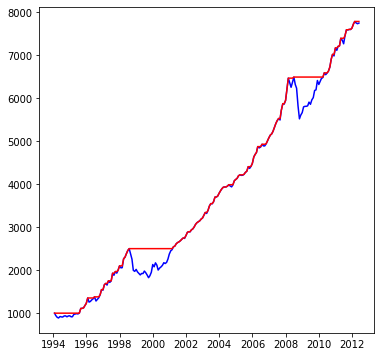

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(Global_Macro.Date, Global_Macro.CumReturn, color='blue')
plt.plot(Global_Macro.Date, HWM,color = 'red')

plt.show()
# start_date = data_full.Date[j] #date when the highest price was observed (before the largest drop)
# end_date = data_full.Date[i] #date when the largest drop was observed
# start_prc = data_full.Price[j] #obtain the price when the highest price observed (before the largest drop)
# end_prc = data_full.Price[i] #obtain the price when the largest drop was observed


## Part 3

In this part, we explore Equity Long/Short fund where we run two regressions; univariate regression on HF's excess return on market excess return and a multivariate regression on the market, size, value and momemntum factors. 
We do this to understand loadings of different factors and explore investment style of the HF manager

In [15]:
LN_SH = HF_data['Ln/Sh Eq Hedge Fund USD']
market_rf = HF_data['Mkt-RF'] 
market_rf = sm.add_constant(market_rf)
LN_SH

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0      0.0117
1     -0.0250
2     -0.0391
3     -0.0157
4      0.0056
        ...  
217    0.0264
218    0.0050
219   -0.0047
220   -0.0453
221    0.0034
Name: Ln/Sh Eq Hedge Fund USD, Length: 222, dtype: float64

In [16]:
univariate_model = sm.OLS(LN_SH,market_rf).fit()
print(univariate_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Ln/Sh Eq Hedge Fund USD   R-squared:                       0.565
Model:                                 OLS   Adj. R-squared:                  0.563
Method:                      Least Squares   F-statistic:                     286.1
Date:                     Thu, 14 May 2020   Prob (F-statistic):           1.13e-41
Time:                             20:00:42   Log-Likelihood:                 565.92
No. Observations:                      222   AIC:                            -1128.
Df Residuals:                          220   BIC:                            -1121.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [17]:
X1 = HF_data[['Mkt-RF','SMB','HML','UMD']]
X1 = sm.add_constant(X1)
multivariate_model = sm.OLS(y,X1).fit()
print(multivariate_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     54.96
Date:                Thu, 14 May 2020   Prob (F-statistic):           5.98e-32
Time:                        20:00:42   Log-Likelihood:                 614.03
No. Observations:                 222   AIC:                            -1218.
Df Residuals:                     217   BIC:                            -1201.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      1.986      0.0

In [18]:
univariate_alpha = univariate_model.params[0]
multivariate_alpha = multivariate_model.params[0]
print("univariate alpha =  %6.3f" %(univariate_alpha*12))
print("multivariate alpha =  %6.3f" % (multivariate_alpha*12))

univariate alpha =   0.062
multivariate alpha =   0.025


## Part 4
In this part, we are exploring whether Convertible Bond Arbitrage fund is illiquid or not by factoring lag in our regression model. 

In [21]:
ConArb = HF_data[' Cnvrt Arb Hedge Fund USD']
ConArb_Ereturn = (ConArb - risk_free)
Market_Ereturn = (HF_data['Mkt-RF'] - risk_free)
Market_1ML = Market_Ereturn.shift(-1)
Market_2ML = Market_Ereturn.shift(-2)
Market_Ereturn = sm.add_constant(Market_Ereturn)
Market_Ereturn.rename({0:"Market_Ereturn"}, axis="columns",inplace=True)

# Univariate Regression against Market Excess Return
model1 = sm.OLS(ConArb_Ereturn,Market_Ereturn).fit()
Beta1 = model1.params[1]
print("Beta with market excess return is: %6.2f" %Beta1)

# 3-month Excess return using r(t-3)
three_month_ereturn = Market_Ereturn['Market_Ereturn'].rolling(min_periods=1, window=3).sum() # 3-month excess returns of market
three_month_ereturn = sm.add_constant(three_month_ereturn)
ConArb_3MEreturn = ConArb_Ereturn.rolling(min_periods=1, window=3).sum() # 3-month excess returns of ConArb
Beta2 = (sm.OLS(ConArb_3MEreturn,three_month_ereturn).fit()).params[1]
print("Beta with 3-month excess return is: %6.2f" %Beta2)

# Market at t, t-1-Month and t-2-Month lag
Market_Ereturn['Market_1ML'] = Market_1ML  # Append one month lag to Market Excess Return df
Market_Ereturn['Market_2ML'] = Market_2ML # Append two month lag to Market Excess Return df
Market_Ereturn.dropna(inplace = True) # drop rows with NAs
num_rows = len(Market_Ereturn) - len(ConArb_Ereturn) # Get rows which correspond the market excess return df
Beta3 = (sm.OLS(ConArb_Ereturn[:-2],Market_Ereturn).fit()).params[1:].sum()
print("Sum of betas for market return and 1M, 2M excess returns is: %6.2f" %Beta3)




Beta with market excess return is:   0.17
Beta with 3-month excess return is:   0.30
Sum of betas for market return and 1M, 2M excess returns is:   0.26
